In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
planet_pop = pd.read_csv("planet_pop.csv",header=149)
planet_pop

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,tran_flag,soltype,...,sy_gaiamagerr2,sy_tmag,sy_tmagerr1,sy_tmagerr2,sy_kepmag,sy_kepmagerr1,sy_kepmagerr2,rowupdate,pl_pubdate,releasedate
0,Kepler-827 b,Kepler-827,1,1,1,Transit,2016,Kepler,1,Published Confirmed,...,-0.000572,15.35150,0.0077,-0.0077,15.897,NaN,NaN,2016-05-06,2016-05,2016-05-10
1,Kepler-516 b,Kepler-516,1,1,1,Transit,2016,Kepler,1,Published Confirmed,...,-0.000175,11.65160,0.0078,-0.0078,12.059,NaN,NaN,2016-05-06,2016-05,2016-05-10
2,EPIC 211945201 b,EPIC 211945201,1,1,1,Transit,2018,K2,1,Published Confirmed,...,-0.000372,9.66896,0.0061,-0.0061,10.115,NaN,NaN,2018-10-24,2018-12,2018-10-26
3,HD 152843 c,HD 152843,1,1,2,Transit,2021,Transiting Exoplanet Survey Satellite (TESS),1,Published Confirmed,...,-0.000237,8.40302,0.0060,-0.0060,NaN,NaN,NaN,2021-06-11,2021-05,2021-06-11
4,Kepler-122 c,Kepler-122,1,1,5,Transit,2014,Kepler,1,Published Confirmed,...,-0.000249,13.78670,0.0078,-0.0078,14.247,NaN,NaN,2014-05-14,2014-03,2014-05-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Kepler-427 b,Kepler-427,1,1,1,Transit,2014,Kepler,1,Published Confirmed,...,-0.000266,13.75600,0.0066,-0.0066,14.221,NaN,NaN,2014-10-03,2014-12,2014-10-03
187,Kepler-39 b,Kepler-39,1,1,1,Transit,2011,Kepler,1,Published Confirmed,...,-0.000275,13.82610,0.0098,-0.0098,14.327,NaN,NaN,2015-01-29,2015-03,2015-01-29
188,HD 206893 b,HD 206893,1,1,2,Imaging,2021,Gemini Observatory,0,Published Confirmed,...,-0.000320,6.25660,0.0060,-0.0060,NaN,NaN,NaN,2022-12-05,2022-08,2022-12-05
189,HD 206893 c,HD 206893,1,1,2,Imaging,2022,European Southern Observatory,0,Published Confirmed,...,-0.000320,6.25660,0.0060,-0.0060,NaN,NaN,NaN,2022-12-05,2022-08,2022-12-05


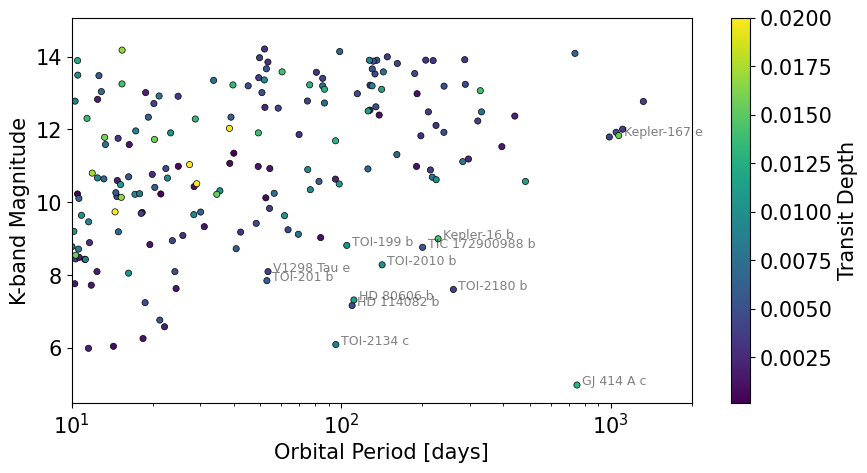

In [3]:
c = (0.102763*planet_pop['pl_radj'] / planet_pop['st_rad'])**2
plt.rcParams.update({'font.size': 15})
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
plot = ax.scatter(planet_pop['pl_orbper'],planet_pop['sy_kmag'],c=c,s=20,cmap='viridis',edgecolors='k',linewidths=0.5,vmax=0.02)
ax.set_xscale('log')
ax.set_xlim(10,2000)
plt.colorbar(plot,label='Transit Depth')

ax.set_xlabel('Orbital Period [days]')
ax.set_ylabel('K-band Magnitude')
for i in range(0,len(planet_pop)):
    if planet_pop['pl_name'][i] == 'Kepler-167 e':
        ax.annotate(planet_pop['pl_name'][i],(planet_pop['pl_orbper'][i],planet_pop['sy_kmag'][i]), fontsize=9,alpha=0.5,textcoords='offset pixels',xytext=(5,0))
    if planet_pop['pl_orbper'][i] > 50 and planet_pop['sy_kmag'][i] < 9:
        ax.annotate(planet_pop['pl_name'][i],(planet_pop['pl_orbper'][i],planet_pop['sy_kmag'][i]), fontsize=9,alpha=0.5,textcoords='offset pixels',xytext=(5,0))
plt.savefig('param_space.png',dpi=300)